In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(10,6)})

## 1. Auto Regressive model (AR)
1. suitable for data without seasional an trend component

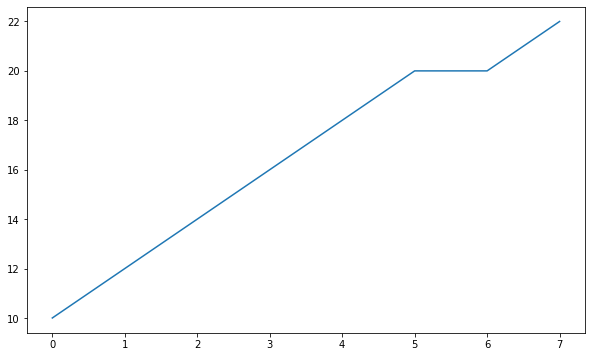

In [2]:
from statsmodels.tsa.ar_model import AutoReg

# create a linear data
data = [10,12,14,16,18,20,20,22] 

plt.plot(data)

In [3]:
#model with 1 lag
## 1 lag means next value depends on prev value
Ar_model = AutoReg(data, lags=1) 
## fitting model
Ar_model_fit = Ar_model.fit() 

In [4]:
# making the prediction
#it means predict the from 8 index to 15 index and org data has 8 value
y_pred = Ar_model_fit.predict(8,15) 
print(y_pred)

[23.125      24.14453125 25.06848145 25.90581131 26.6646415  27.35233136
 27.97555029 28.54034245]


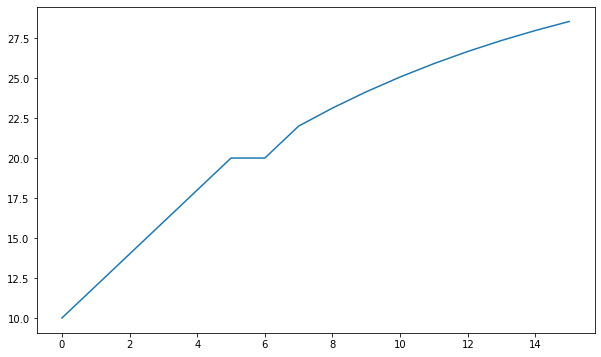

In [5]:
# ploting the predication
pred_list = y_pred.tolist()
combine_pred_data = data + pred_list
plt.plot(combine_pred_data)

### Note:
1. So in AR model the future value depends on the previous value and trend is also continue for next value.

## 2. Moving Average Model (MA)

In [6]:
from statsmodels.tsa.arima_model import ARMA

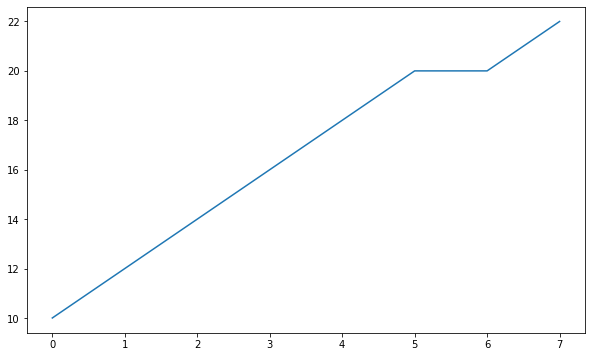

In [7]:
# our orginal data
plt.plot(data)

In [8]:
## fitting the model
MA_model = ARMA(data , order=(0,1)) # model with AR = 0 and MA = 1
MA_model_fit = MA_model.fit(disp=False)

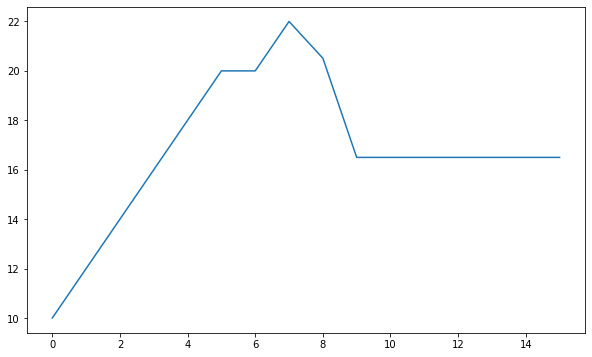

In [9]:
## predicatin the model
y_pred = MA_model_fit.predict(8,15)

## combining the org data and pred data then plot
ypred_list = y_pred.tolist()
combine_Data = data + ypred_list

plt.plot(combine_Data)

## Note:
1. Here we can see the result is different from the AR model because the AR model internaly fit the regression model which use previous value and trend for predicating the next value where as the MA model also take the residuals to consideration and then predict the value.

## 3.  AutoRegressive Moving Average Model (ARMA)

In [12]:
import pandas as pd
drug_data = pd.read_csv('aus_drug.csv',parse_dates=['date'],index_col='date')
drug_data.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


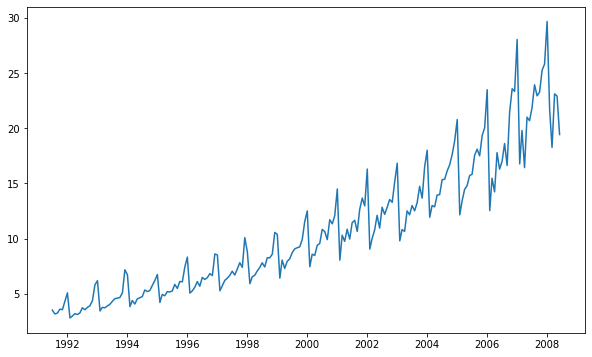

In [13]:
#ploting the data
plt.plot(drug_data['value'])

In [22]:
# fit the model
ARMA_model = ARMA(drug_data['value'],order=(1,1)) # AR = 1 and MA = 1
ARMA_model_fit = ARMA_model.fit(disp=False)

G:\Program_Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


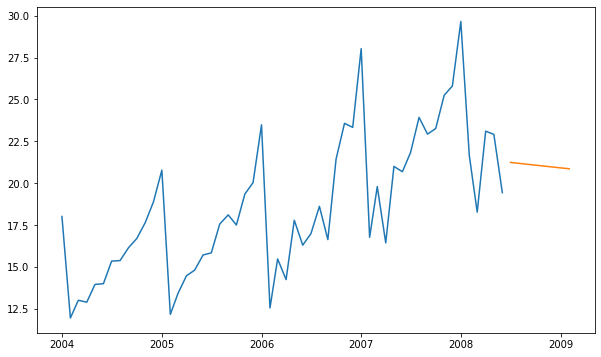

In [61]:
## predict the values
y_pred = ARMA_model_fit.predict(len(drug_data),len(drug_data)+7)

drug_data_copy = drug_data.copy()
drug_data_copy = pd.concat([drug_data_copy,y_pred],axis=1)
plt.plot(drug_data_copy[150:])

## 4. AutoRegressive Intergated Moving Average Model (ARIMA)

In [38]:
from statsmodels.tsa.arima_model import ARIMA

In [57]:
# fit model
# p,d and q value
# p = AR , d = Integrated value(windows or lag like 12 month) , q = MA 
ARIMA_model = ARIMA(drug_data['value'] , order=(1,1,1)) 
ARIMA_model_fit = ARIMA_model.fit()

G:\Program_Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
G:\Program_Files\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


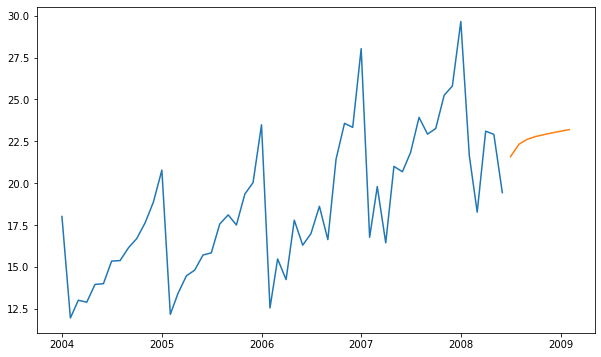

In [60]:
## predication
y_pred = ARIMA_model_fit.predict(len(drug_data),len(drug_data)+7 , typ='levels')

## combine and plot
drug_data_copy = drug_data.copy()
drug_data_copy = pd.concat([drug_data_copy,y_pred],axis=1)
plt.plot(drug_data_copy[150:])